In [1]:
from miran import *

In [ ]:
def parse_pc_gs(my_string):
    print(my_string)
    tonic, pcset = my_string.split(":")
    tonicpc = chroma_to_pc(tonic)
    pcset = pcset.split(', ')
    pcs = []
    for pitch in pcset:
        if tonicpc == -1:
            pcs.append(chroma_to_pc(pitch))
        else:
            pcs.append((chroma_to_pc(pitch) - tonicpc) % 12)
    pcs.sort()
    return tonic, pcs

In [2]:
# load data
d_raw = pd.read_excel('/Users/angel/Insync/Datasets/giantsteps/GiantSteps_v3.xlsx')

# filter items from GS+
d = d_raw[d_raw['*']=='+']

# and leave out unused fields
#d = d.filter(['id','key_v1','tonic:notes1', 'label1'])

In [ ]:
# create separate lists for different analysis parameters
pcsets = []
cardinalities = []
new_keys = []
basic_modes = []
explicit_modes = []

for item in d.detail1:
    explicit_mode = []
    tonic, pcs = parse_pc_gs(item)
    pcsets.append(pcs)
    cardinalities.append(len(pcs))
    if tonic == 'X':
        new_keys.append('{}'.format(tonic))
        basic_modes.append('')
        explicit_modes.append('')
        continue
        
    # Find Basic Modality:
    triad = 'other'
    basic_mode = 'other'

    if set(pcs) > set([0,4]):
        triad = 'major'
        basic_mode = 'major'
        
        if set(pcs) > set([0,3]):
            triad = 'major | {} minor'.format(tonic)
            basic_mode = 'majmin'

    elif set(pcs) > set([0,3]):
        triad = 'minor'
        basic_mode = 'minor'

    basic_modes.append(basic_mode)    
    new_keys.append('{} {}'.format(tonic, triad))
    
    # FIND MORE DETAILED MODALITY:
    # majors
    if set(pcs) > set([0,1,4,7]):
        explicit_mode.append('phrygian-major')
    if set(pcs) == set([0,2,4,7,9]):
        explicit_mode.append('pentamaj')
    if set(pcs) > set([0,2,4,9,11]):
        explicit_mode.append('ionian')
    if set(pcs) > set([0,2,4,9,10]):
        explicit_mode.append('mixolydian')
    if set(pcs) > set([0,2,4,8]):
        explicit_mode.append('major-b6')

    # minors
    if set(pcs) > set([0,3,5,7,10]):
        explicit_mode.append('pentamin')
    if set(pcs) > set([0,2,3,8,10]):
            explicit_mode.append('aeolian')
    if set(pcs) > set([0,2,3,9,10]):
            explicit_mode.append('dorian')
    if set(pcs) > set([0,1,3,5,7,10]):
        explicit_mode.append('phrygian')
    if set(pcs) > set([0,3,5,7,8,11]):
        explicit_mode.append('harmonic')

    #others
    if set(pcs) > set([0,1,3,6]):
        explicit_mode.append('locrian')

    explicit_modes.append(explicit_mode)

# and append them as new columns.
d['newkey'] = new_keys
d['pcset'] = pcsets
d['cardinality'] = cardinalities
d['basic_mode'] = basic_modes
d['explicit_mode'] = explicit_modes

In [ ]:
df_to_excel(d, '/Users/angel/Desktop/GiantSteps+')

In [ ]:
# FOR KEY CHANGES

# load data
d_raw = pd.read_excel('/Users/angel/Desktop/GiantSteps+.xlsx')

# filter items with a second key annotated
d = d_raw[d_raw.detail2.isnull()==False]

# and leave out unused fields
#d = d.filter(['id','key_v1','tonic:notes1', 'label1'])

In [ ]:
len(d)

In [ ]:
# create separate lists for different analysis parameters
pcsets = []
cardinalities = []
new_keys = []
basic_modes = []
explicit_modes = []

for item in d.detail2:
    explicit_mode = []
    tonic, pcs = parse_pc_gs(item)
    pcsets.append(pcs)
    cardinalities.append(len(pcs))
    if tonic == 'X':
        new_keys.append('{}'.format(tonic))
        basic_modes.append('')
        explicit_modes.append('')
        continue
        
    # Find Basic Modality:
    triad = 'other'
    basic_mode = 'other'

    if set(pcs) > set([0,4]):
        triad = 'major'
        basic_mode = 'major'
        
        if set(pcs) > set([0,3]):
            triad = 'major | {} minor'.format(tonic)
            basic_mode = 'majmin'

    elif set(pcs) > set([0,3]):
        triad = 'minor'
        basic_mode = 'minor'

    basic_modes.append(basic_mode)    
    new_keys.append('{} {}'.format(tonic, triad))
    
    # FIND MORE DETAILED MODALITY:
    # majors
    if set(pcs) > set([0,1,4,7]):
        explicit_mode.append('phrygian-major')
    if set(pcs) == set([0,2,4,7,9]):
        explicit_mode.append('pentamaj')
    if set(pcs) > set([0,2,4,9,11]):
        explicit_mode.append('ionian')
    if set(pcs) > set([0,2,4,9,10]):
        explicit_mode.append('mixolydian')
    if set(pcs) > set([0,2,4,8]):
        explicit_mode.append('major-b6')

    # minors
    if set(pcs) > set([0,3,5,7,10]):
        explicit_mode.append('pentamin')
    if set(pcs) > set([0,2,3,8,10]):
            explicit_mode.append('aeolian')
    if set(pcs) > set([0,2,3,9,10]):
            explicit_mode.append('dorian')
    if set(pcs) > set([0,1,3,5,7,10]):
        explicit_mode.append('phrygian')
    if set(pcs) > set([0,3,5,7,8,11]):
        explicit_mode.append('harmonic')

    #others
    if set(pcs) > set([0,1,3,6]):
        explicit_mode.append('locrian')

    explicit_modes.append(explicit_mode)

# and append them as new columns.
d['newkey2'] = new_keys
d['pcset2'] = pcsets
d['cardinality2'] = cardinalities
d['basic_mode2'] = basic_modes
d['explicit_mode2'] = explicit_modes

In [3]:
df_to_excel(d, '/Users/angel/Desktop/GiantStepsKeyChanges')


Saving dataframe to excel spreadsheet /Users/angel/Desktop/GiantStepsKeyChanges


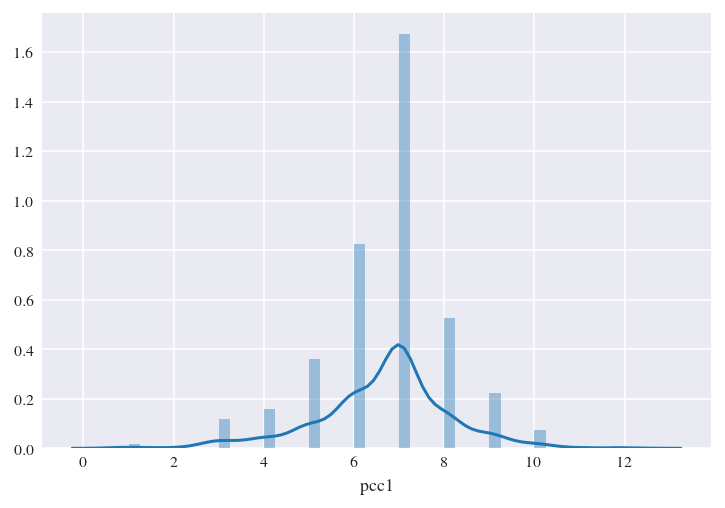

In [12]:
sns.distplot(d.pcc1, kde=True)

## 